In [1]:
import os
from collections import defaultdict
from typing import NamedTuple, List

import requests
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
parent_url = "https://adsorption.nist.gov/isodb/api/"
browse_url = os.path.join(parent_url, "isotherms.json")

In [3]:
def file_url(filename):
    return os.path.join(parent_url, "isotherm", f"{filename}.json")

In [4]:
def get_data(filename):
    url = file_url(filename)
    response = requests.get(url)
    
    return response

In [5]:
browse_data = requests.get(browse_url).json()

In [6]:
filename = browse_data[3]["filename"]
# filename = "10.1002adfm.200500561.Isotherm4"

In [7]:
def plot_data(filename):
    data = get_data(filename)
    json_data = data.json()
    pressure_units = json_data["pressureUnits"]
    adsorption_units = json_data["adsorptionUnits"]
    adsorbent = json_data["adsorbent"]["name"]
    adsorbates = ", ".join(d["name"] for d in json_data["adsorbates"])
    pressures = []
    adsorptions = defaultdict(list)
    for d in json_data["isotherm_data"]:
        pressures.append(d["pressure"])
        if d["total_adsorption"]:
            adsorptions["total"].append(d["total_adsorption"])
        else:
            for sd in d["species_data"]:
                adsorptions[sd["InChIKey"]].append(sd["adsorption"])
    for inchi, adsorptions in adsorptions.items():
        name = inchi if inchi == "total" else requests.get(f"https://adsorption.nist.gov/isodb/api/gas/{inchi}.json").json()["name"]
        plt.scatter(pressures, adsorptions, label=name)
        plt.xlabel(f"Pressure ({pressure_units})")
        plt.ylabel(f"Adsorption ({adsorption_units})")
        plt.title(f"Adsorbent: {adsorbent}, Adsorbates: {adsorbates}")
        plt.legend()

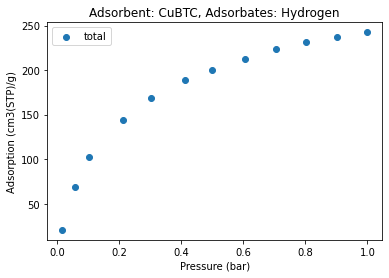

In [8]:
plot_data(browse_data[0]["filename"])

In [9]:
[d for d in browse_data if d["adsorbent"]["hashkey"] == "NIST-MATDB-6b09d0ff0664abd16ff9ce858bbec312"]

[{'filename': '10.1007s110510132071x.Isotherm1',
  'DOI': '10.1007/s11051-013-2071-x',
  'adsorbent': {'hashkey': 'NIST-MATDB-6b09d0ff0664abd16ff9ce858bbec312'},
  'adsorbates': [{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N'}],
  'category': 'sim',
  'temperature': 100,
  'tabular_data': 0,
  'isotherm_type': ''}]

In [10]:
requests.get("https://adsorption.nist.gov/isodb/api/gas/UFHFLCQGNIYNRP-UHFFFAOYSA-N.json").json()

{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N',
 'name': 'Hydrogen',
 'InChICode': 'InChI=1S/H2/h1H',
 'formula': 'H2',
 'synonyms': ['Dihydrogen',
  'H2',
  'Hydrogen monohydride',
  'Molecular hydrogen']}

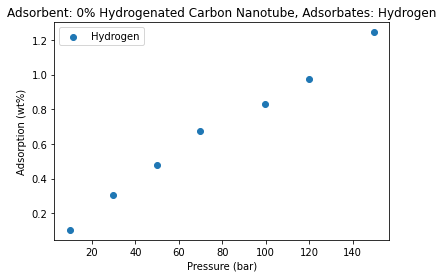

In [11]:
plot_data("10.1007s110510132071x.Isotherm1")

In [12]:
get_data("10.1007s110510132071x.Isotherm1").json()

{'filename': '10.1007s110510132071x.Isotherm1',
 'DOI': '10.1007/s11051-013-2071-x',
 'articleSource': 'Figure 4- 0 percent',
 'date': '2018-08-06',
 'digitizer': 'Julie Yagodich',
 'adsorbent': {'hashkey': 'NIST-MATDB-6b09d0ff0664abd16ff9ce858bbec312',
  'name': '0% Hydrogenated Carbon Nanotube'},
 'adsorbates': [{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N',
   'name': 'Hydrogen'}],
 'category': 'sim',
 'temperature': 100,
 'tabular_data': 0,
 'isotherm_type': '',
 'adsorptionUnits': 'wt%',
 'pressureUnits': 'bar',
 'compositionType': 'molefraction',
 'concentrationUnits': '',
 'isotherm_data': [{'pressure': 9.756,
   'total_adsorption': None,
   'species_data': [{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N',
     'composition': 1,
     'adsorption': 0.10331}]},
  {'pressure': 29.887,
   'total_adsorption': None,
   'species_data': [{'InChIKey': 'UFHFLCQGNIYNRP-UHFFFAOYSA-N',
     'composition': 1,
     'adsorption': 0.30537}]},
  {'pressure': 49.865,
   'total_adsorption': None,
   'speci